## Global Settings and Imports

In [1]:
import os
from os import path
import sys

PROJECT_DIR = path.abspath(path.join(os.getcwd(), "..", ".."))
sys.path.append(PROJECT_DIR)

from utils.model_manager import ModelManager, ManagerArgs

c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Prepare parameters

In [5]:
args = [
    ManagerArgs(
        config_path = path.join(PROJECT_DIR, "config/model/nrms/exp_demo1.yaml")
    )
]

ckpt_paths = [
    path.join(PROJECT_DIR, "logs/lightning_logs/checkpoints/nrms/exp_demo1/epoch=24-val_auc_epoch=0.6996.ckpt")
]

## 1. args 인가

In [ ]:
model_manager = ModelManager(PROJECT_DIR, args, "train", False)

Seed set to 1234
100%|██████████| 2204/2204 [00:01<00:00, 1128.61it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


## 2. Test 결과 생성

In [7]:
test_results = model_manager.test_all(ckpt_paths)

Seed set to 1234
100%|██████████| 7538/7538 [00:06<00:00, 1132.64it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 7538/7538 [05:20<00:00, 23.50it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         Test metric                 DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_auc_epoch             0.6181129813194275
test_ils_senti@10_bert_epoch      0.4910421371459961
test_ils_senti@10_vader_epoch     0.23405000567436218
 test_ils_senti@5_bert_epoch      0.49574214220046997
test_ils_senti@5_vader_epoch      0.22190050780773163
   test_ils_topic@10_epoch         0.095427505671978
   test_ils_topic@5_epoch         0.12023288756608963
       test_mrr_epoch             0.29015666246414185
     test_ndcg@10_epoch           0.37756600975990295
      test_ndcg@5_epoch           0.31554168462753296
  test_senti@10_bert_epoch        0.41836878657341003
  test_senti@10_vader_epoch      0.04027553

## 3. 시각화

In [ ]:
from utils.test_metrics_viewer import TestMetricsViewer

result_viewer = TestMetricsViewer(test_results)
df = result_viewer.get_result_df()
df.head()

,nrms#exp_demo1
test_auc_epoch,0.618113
test_mrr_epoch,0.290157
test_ndcg@10_epoch,0.377566
test_ndcg@5_epoch,0.315542
test_senti@10_vader_epoch,0.040276
test_senti@5_vader_epoch,0.028419
test_senti_mrr_vader_epoch,0.013680
test_senti@10_bert_epoch,0.418369
test_senti@5_bert_epoch,0.246690
test_senti_mrr_bert_epoch,0.136076


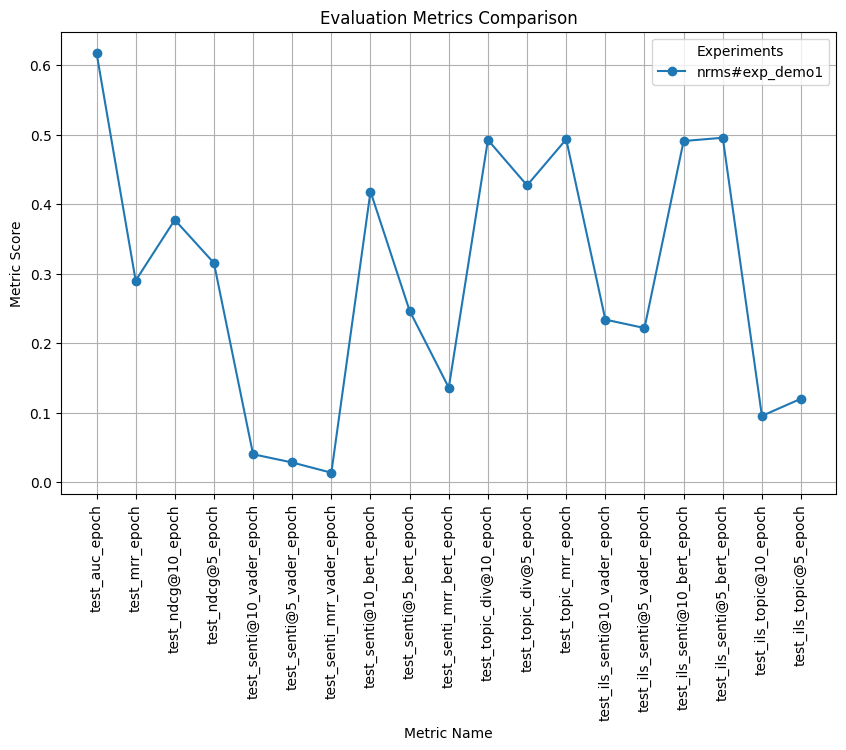

In [10]:
result_viewer.show()